In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 16]
import importlib

In [3]:
# RUN ONCE
import PokemonUtils as pkmnUtils
utils = pkmnUtils.PokemonUtils()

In [19]:
# RUN ON POKEMONUTILS CHANGE (only if you update the file for some reason and want change to propogate)
import PokemonUtils as pkmnUtils
importlib.reload(pkmnUtils)  # update import if PokemonUtils.py changes
utils = pkmnUtils.PokemonUtils(utils=utils)  # pass in all_gifs from previous copy of utils

loaded previous 940 datapoints
smallest: [14 15 29  4]
largest: [299 188 234   4]


In [8]:
pass

In [9]:
# load GIFs into RAM
utils.loadAllGIFs()

25 done!
50 done!
75 done!
100 done!
125 done!
150 done!
175 done!
200 done!
225 done!
250 done!
275 done!
300 done!
325 done!
350 done!
375 done!
400 done!
425 done!
450 done!
475 done!
500 done!
525 done!
550 done!
575 done!
600 done!
625 done!
650 done!
675 done!
700 done!
725 done!
750 done!
775 done!
800 done!
825 done!
850 done!
875 done!
900 done!
925 done!
all 940 done!


In [15]:
# Generate data as first frame of each gif
x_train, x_val, x_test, y_train, y_val, y_test = utils.generateXYSplitsV2(outFile="Data/SplitsV2")

x_train: (6010, 128, 128, 4)
x_val:   (1510, 128, 128, 4)
x_test:  (1880, 128, 128, 4)
y_train: (6010,)
y_val:   (1510,)
y_test:  (1880,)


In [20]:
utils.localLoadAllGifs("Data/SplitsV2.npz")

x_train: (6010, 128, 128, 4)
x_val:   (1510, 128, 128, 4)
x_test:  (1880, 128, 128, 4)
y_train: (6010,)
y_val:   (1510,)
y_test:  (1880,)


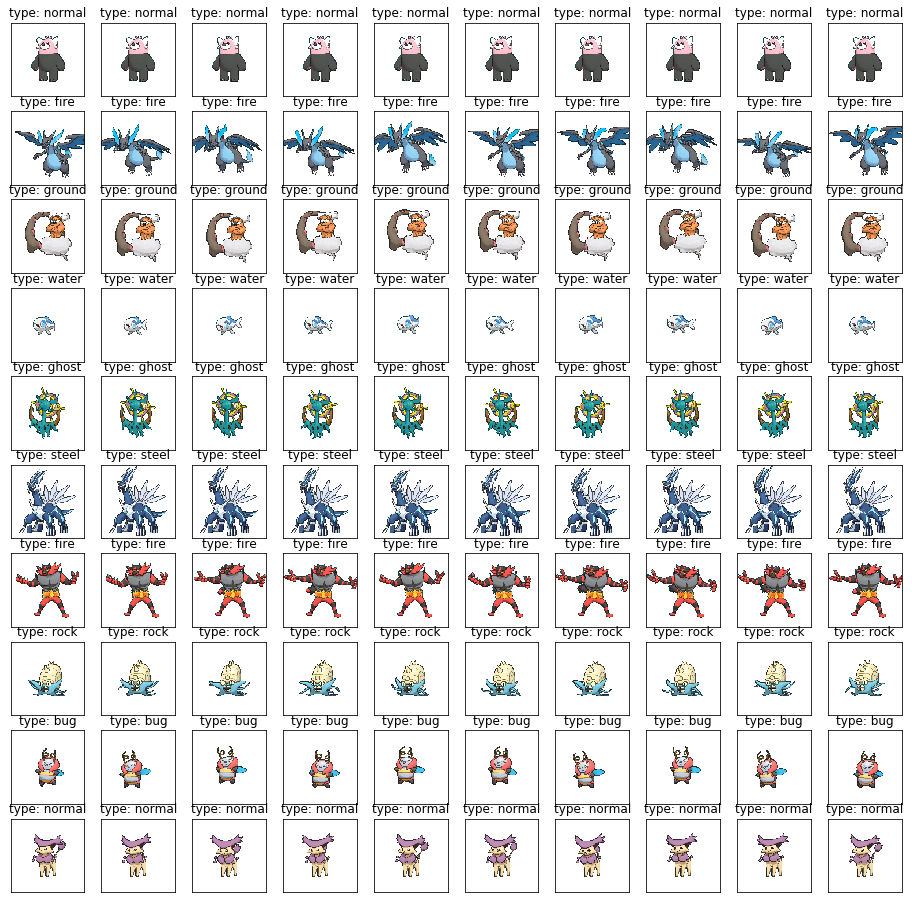

In [23]:
# Example (x,y) pairs from the training set
d = 10
offset = 700
f, axarr = plt.subplots(d, d)
for i in range(d):
    for j in range(d):
        axarr[i][j].imshow(x_train[i*d+j+offset,:,:,:])
        axarr[i][j].set_title("type: " + utils.typeToName(y_train[i*d+j+offset]))
        axarr[i][j].set_xticks([])
        axarr[i][j].set_yticks([])


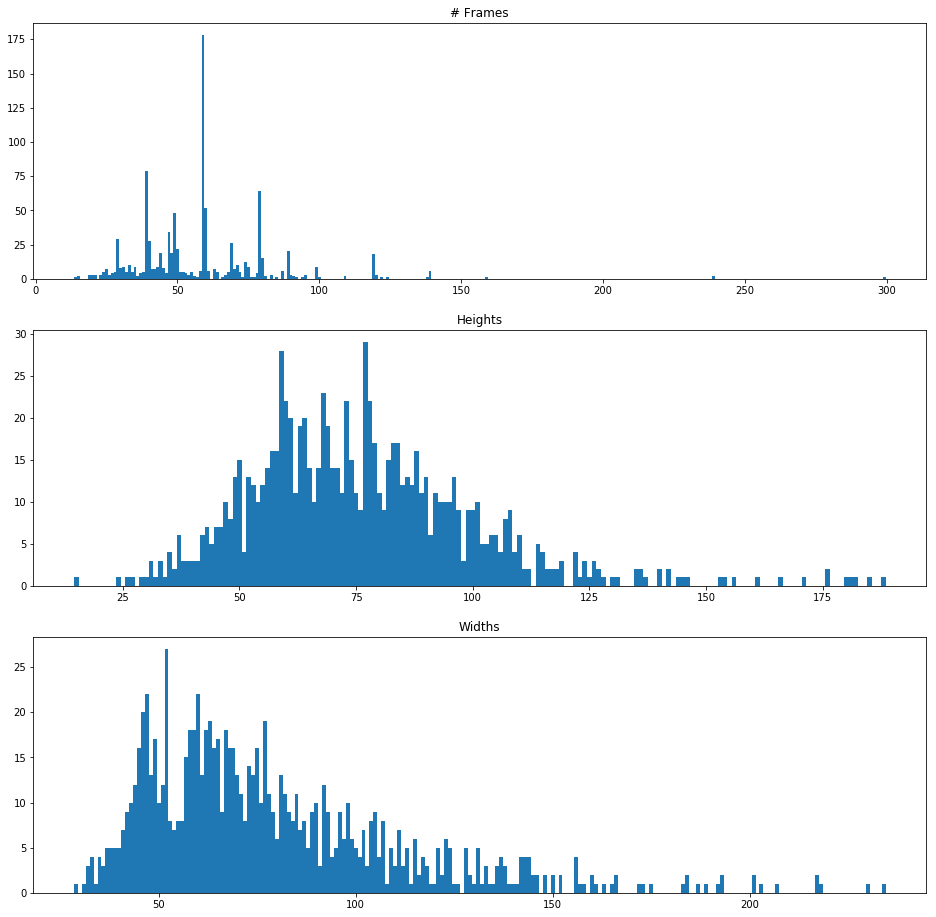

In [32]:
T = []
H = []
W = []
for gif in utils.all_gifs:
    T.append(gif.shape[0])
    H.append(gif.shape[1])
    W.append(gif.shape[2])

f, axarr = plt.subplots(3)
data = (np.array(T), np.array(H), np.array(W))
titles = ("# Frames", "Heights", "Widths")
for i in range(3):
    axarr[i].set_title(titles[i])
    d = np.diff(np.unique(data[i])).min()
    left_of_first_bin = data[i].min() - float(d)/2
    right_of_last_bin = data[i].max() + float(d)/2
    axarr[i].hist(data[i], np.arange(left_of_first_bin, right_of_last_bin + d, d))